In [44]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()

In [46]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [47]:
data = pd.DataFrame(data, columns = columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
data.shape

(506, 13)

In [49]:
# Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 2022)

In [50]:
X_train['RM'].values.reshape(-1,1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [51]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [52]:
# RM의 갯수로 학습
sim_lr.fit(X_train['RM'].values.reshape(-1,1), y_train)

LinearRegression()

In [53]:
# RM의 갯수로 예측
y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))

In [54]:
# 결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'. format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2: 0.2121


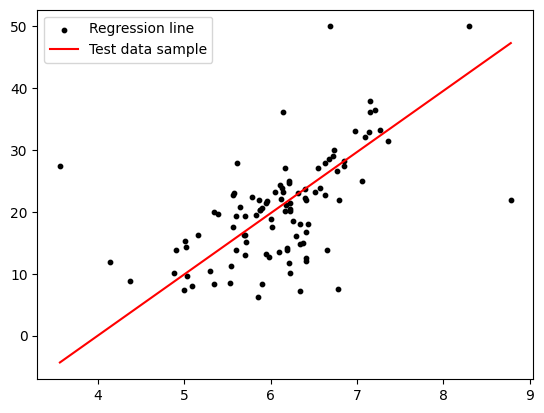

In [55]:
# 결과 시각화 하기
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s = 10, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

In [56]:
# Multiple Lineaer Regression
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = mul_lr.predict(X_test)

In [58]:
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.6226


In [59]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 4)

In [60]:
dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)

DecisionTreeRegressor(max_depth=4)

In [61]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [62]:
# 적절한 max_depth값을 설정해야한다. (overfitting, uderfitting 됨)
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3816


In [63]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [64]:
best_depth = 0
best_r2 = 0

for depth in arr:
    dt_regr = DecisionTreeRegressor(max_depth = depth)
    dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
    y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

    temp_r2 = r2_score(y_test, y_pred)
    # print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

    if best_r2 < temp_r2:
        best_depth = depth
        best_r2 = temp_r2
print('\n최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))


최적의 결과는 depth=3 r2=0.3931


In [65]:
dt_regr = DecisionTreeRegressor(max_depth = 8)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7389


In [66]:
# Suppoter Vector machine Regressor (SVM)
from sklearn.svm import SVR
svm_regr = SVR(C=5)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4049


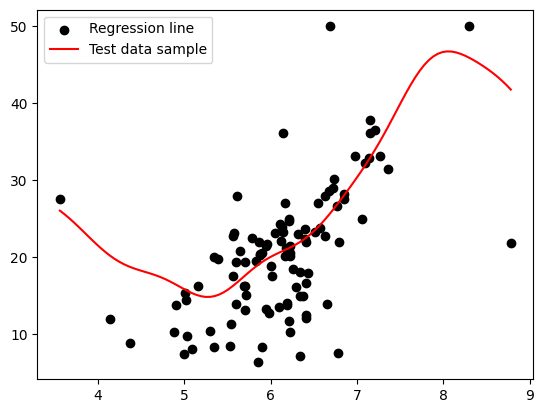

In [67]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

In [68]:
svm_regr = SVR(C=20)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2: 0.4234


In [ ]:
best_depth = 0
best_r2 = 0

for C in arr:
    dt_regr = DecisionTreeRegressor(max_depth = depth)
    dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
    y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

    temp_r2 = r2_score(y_test, y_pred)
    # print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

    if best_r2 < temp_r2:
        best_depth = depth
        best_r2 = temp_r2
print('\n최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))